### O Caso Energia
No MPRJ tratamos de grandes massas de documentos textuais.<br>
Hoje, boa parte deste trabalho é realizado pelos servidores da casa de forma manual, old fashion: abre o documento, lê o documento, entende o documento, toma uma decisão acerca do documento.<br>

Com a ajuda da Estatística e da Inteligência Artificial queremos mudar esta realidade!

Anualmente, o setor de Apoio Operacional a Demandas do Consumidor analisa mais de 580.000 processos do Tribunal de Justiça do Rio de Janeiro. 

Este trabalho é realizado pelos nossos caprichosos e empenhados estagiários!

Recentemente, nosso intrépido estagiário recebeu uma gloriosa demanda: identificar possíveis tutelas coletivas em processos relativos a Forncecimento de Energia Elétrica no estado do Rio de Janeiro. 

Para não maltratar muito nosso servidor público, separamos Decisões Interlocutórias e Sentenças para que ele possa trabalhar e ele identificou, classificou e separou alguns tópicos, são eles:

    - Cobrança de Servico Não Fornecido
    - Problemas de Cobrança ou Tarifa
    - Dificuldade de Contratação ou Recusa Injustificada
    - Interrupção ou Instabilidade no Fornecimento
    - Cobrança Sob Ameaça
    - Danos a Eletrodomésticos
    - Dificuldade de Renegociação
    - Negativação Indevida

Claro, temos que levar em consideração a qualidade dessa classificação, seus vieses e possíveis erros que, apesar de todo o capricho, nosso estagiário possa ter cometido.

Utilizando esta massa de dados produzimos um modelo de Machine Learning que produziu os seguintes resultados:

```
                                           precision    recall  f1-score   support

                      DemandaNaoResolvida       0.93      0.84      0.88      8954
                  DificuldadeRenegociacao       0.92      0.84      0.87      9120
DificuldadeContratacaoRecusaInjustificada       0.73      0.93      0.82      6526
     InterrupcaoInstabilidadeFornecimento       0.82      0.81      0.81      8444
                        CobrancaSobAmeaca       0.98      0.86      0.92      9476
                      NegativacaoIndevida       0.98      0.94      0.96      8484
              CobrancaServicoNaoFornecido       0.89      0.95      0.92      7713
                           CobrancaTarifa       0.83      0.95      0.89      7123

                              avg / total       0.89      0.89      0.89     65840
```

# Resultados

Observamos que a base é desbalanceada, por isso é essêncial utilizar um método de oversampling.

Também, para atingir melhores resultados com dados textuais, é necessário um préprocessamento.

Nesse caso, aplicamos o TFIDF por contruir vetores que informam sobre a relevância de palavras no texto.

Assim, testamos três modelos: Naive Bayes, Adaboost e Support Vector Classifier.

O Naive Bayes é o mais simples e trouxe um resultado razoável. Porém, com precision muito baixa para
categorias com pouco dado.

O Adaboost, apesar de recomendado pela literatura, teve péssima performance. Isso deve ser devido a algum erro
no processo de contrução do classificador.

O SVC teve o melhor resultado dos três. Apesar de não atingir a precisão do modelo de vocês em todos os parâmetros, obteve resultados melhores na média de precision e recall. 

O que faltou:

- Melhor tratamento do texto como retirada de stopwords, de não-letras. Também, modelos de Bagofwords podem auxiliar.
- Tunar o modelo de SVC para atingir melhores resutados
- Testar outros modelos de classificação
- Fazer um voting dos modelos

```
                                                 pre       rec       spe        f1       geo       iba       sup

              CobrancaServicoNaoFornecido       0.95      0.87      1.00      0.91      0.93      0.86        23
                        CobrancaSobAmeaca       0.97      0.98      1.00      0.98      0.99      0.98      2335
                           CobrancaTarifa       0.41      0.83      1.00      0.55      0.91      0.82        24
                    DanosEletrodomesticos       0.96      0.98      0.99      0.97      0.99      0.97      2291
DificuldadeContratacaoRecusaInjustificada       0.87      0.93      1.00      0.90      0.97      0.93       184
                  DificuldadeRenegociacao       0.65      0.46      1.00      0.54      0.68      0.44        69
     InterrupcaoInstabilidadeFornecimento       0.99      0.98      0.99      0.99      0.99      0.97     10993
                      NegativacaoIndevida       0.69      0.53      1.00      0.60      0.73      0.50        17

                              avg / total       0.98      0.98      0.99      0.98      0.98      0.97     15936

```

In [6]:
import pandas as pd
from copy import deepcopy
from pathlib import Path
import pickle

# Load Data

## Untargz

In [ ]:
!gunzip -c energia.tar.gz | tar xopf -

## Load Data

In [3]:
raw_path = Path.cwd().parent / 'energia' 

In [4]:
data = []
for cat in raw_path.glob('*'):
    datum = {}
    datum['categoria' ] = cat.stem
    for text in cat.glob('*.txt'):
        datum['texto'] = open(text, 'r').read()
        data.append(deepcopy(datum))

In [5]:
data = pd.DataFrame(data)

In [8]:
#pickle.dump(data, open('energia.p', 'wb'))
#pickle.load(open('energia.p', 'rb'))

In [7]:
data.head()

,categoria,texto
0,DificuldadeContratacaoRecusaInjustificada,Trata-se de ação proposta pelo procedimento co...
1,DificuldadeContratacaoRecusaInjustificada,"Inicialmente, por se tratar de relação de hipo..."
2,DificuldadeContratacaoRecusaInjustificada,Não há como em sede de cognição sumária saber-...
3,DificuldadeContratacaoRecusaInjustificada,Trata-se de demanda em que a parte autora afir...
4,DificuldadeContratacaoRecusaInjustificada,A parte autora requer a tutela provisória visa...


In [23]:
categorias = list(data.categoria.unique())

In [24]:
categorias

['DificuldadeContratacaoRecusaInjustificada',
 'CobrancaTarifa',
 'CobrancaSobAmeaca',
 'NegativacaoIndevida',
 'InterrupcaoInstabilidadeFornecimento',
 'DanosEletrodomesticos',
 'DificuldadeRenegociacao',
 'CobrancaServicoNaoFornecido']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79678 entries, 0 to 79677
Data columns (total 2 columns):
categoria    79678 non-null object
texto        79678 non-null object
dtypes: object(2)
memory usage: 1.2+ MB


# Pré Análise

Olhando para o número de entradas por categoria, percebemos que temos uma base extremamente desbalanceada.

Três categorias representam 98% da base.

Isso é um problema, pois para o ideal é o modelo ser treinado com uma base equilibrada. 

Para isso teremos que usar métodos de balanceamento. Seja, undersampling como oversampling.

A biblioteca imbalanced-learn.readthedocs.io tem bons métodos para isso.

In [35]:
cat_count = data.groupby('categoria').count()
cat_count['prop'] = cat_count.apply(lambda x: round(100 * x / float(x.sum()), 1))

In [36]:
cat_count

,texto,prop
categoria,,
CobrancaServicoNaoFornecido,163,0.2
CobrancaSobAmeaca,11511,14.4
CobrancaTarifa,135,0.2
DanosEletrodomesticos,11775,14.8
DificuldadeContratacaoRecusaInjustificada,922,1.2
DificuldadeRenegociacao,305,0.4
InterrupcaoInstabilidadeFornecimento,54803,68.8
NegativacaoIndevida,64,0.1


# Estruturando Dataset

In [12]:
from collections import Counter

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

## Divide dataset entre treino e teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data['texto'], 
                                                    data['categoria'],
                                                    train_size=0.8, 
                                                    test_size=0.2)

In [13]:
print('Training class distributions summary: {}'.format(Counter(y_train)))
print('Test class distributions summary: {}'.format(Counter(y_test)))

Training class distributions summary: Counter({'InterrupcaoInstabilidadeFornecimento': 43810, 'DanosEletrodomesticos': 9484, 'CobrancaSobAmeaca': 9176, 'DificuldadeContratacaoRecusaInjustificada': 738, 'DificuldadeRenegociacao': 236, 'CobrancaServicoNaoFornecido': 140, 'CobrancaTarifa': 111, 'NegativacaoIndevida': 47})
Test class distributions summary: Counter({'InterrupcaoInstabilidadeFornecimento': 10993, 'CobrancaSobAmeaca': 2335, 'DanosEletrodomesticos': 2291, 'DificuldadeContratacaoRecusaInjustificada': 184, 'DificuldadeRenegociacao': 69, 'CobrancaTarifa': 24, 'CobrancaServicoNaoFornecido': 23, 'NegativacaoIndevida': 17})


### Função de Resultados da Predição

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(conf_mat, classes):
    
    fig, ax = plt.subplots(figsize=(12,12))
    conf_mat = conf_mat/(conf_mat.sum(axis=1))[:,None]
    sns.heatmap(conf_mat,annot=True, 
                xticklabels=classes, 
                yticklabels=classes)

    plt.ylabel('True')
    plt.xlabel('Predicted')
    return plt.show()

def clf_eval(clf, X, y_true, classes=[0,1]):
    
    y_pred = clf.predict(X)
    print('Classification Report: \n{}'.format(classification_report(y_true, y_pred, labels=np.unique(y_pred))))
    print('Classification Report Imbalanced: \n{}'.format(classification_report_imbalanced(y_true, y_pred)))
        
    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy Score: {}'.format(accuracy))
    
    clf_matrix = confusion_matrix(y_true, y_pred, classes)
    plot_confusion_matrix(clf_matrix, classes)
    
    return accuracy

# Primeiro Modelo

Esse primeiro modelo é o resultado mínimo que podemos chegar.

Serve como comparação com os outros.

Nele aplicaremos TFIDF com Naive Bayes sem nenhum tratamento prévio.

O TFIDF já tira as stopwords e pontuação.

ModuleNotFoundError: No module named 'frozenset'

In [81]:
stopwords = frozenset(open('stopwords.txt', 'r').read().split('\n'))

In [84]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

Classification Report: 
                                      precision    recall  f1-score   support

                   CobrancaSobAmeaca       0.62      0.96      0.75      2335
               DanosEletrodomesticos       0.88      0.87      0.87      2291
InterrupcaoInstabilidadeFornecimento       0.97      0.89      0.93     10993

                           micro avg       0.88      0.90      0.89     15619
                           macro avg       0.82      0.91      0.85     15619
                        weighted avg       0.91      0.90      0.89     15619



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report Imbalanced: 
                                                 pre       rec       spe        f1       geo       iba       sup

              CobrancaServicoNaoFornecido       0.00      0.00      1.00      0.00      0.00      0.00        23
                        CobrancaSobAmeaca       0.62      0.96      0.90      0.75      0.93      0.87      2335
                           CobrancaTarifa       0.00      0.00      1.00      0.00      0.00      0.00        24
                    DanosEletrodomesticos       0.88      0.87      0.98      0.87      0.92      0.84      2291
DificuldadeContratacaoRecusaInjustificada       0.00      0.00      1.00      0.00      0.00      0.00       184
                  DificuldadeRenegociacao       0.00      0.00      1.00      0.00      0.00      0.00        69
     InterrupcaoInstabilidadeFornecimento       0.97      0.89      0.95      0.93      0.92      0.84     10993
                      NegativacaoIndevida       0.00      0.

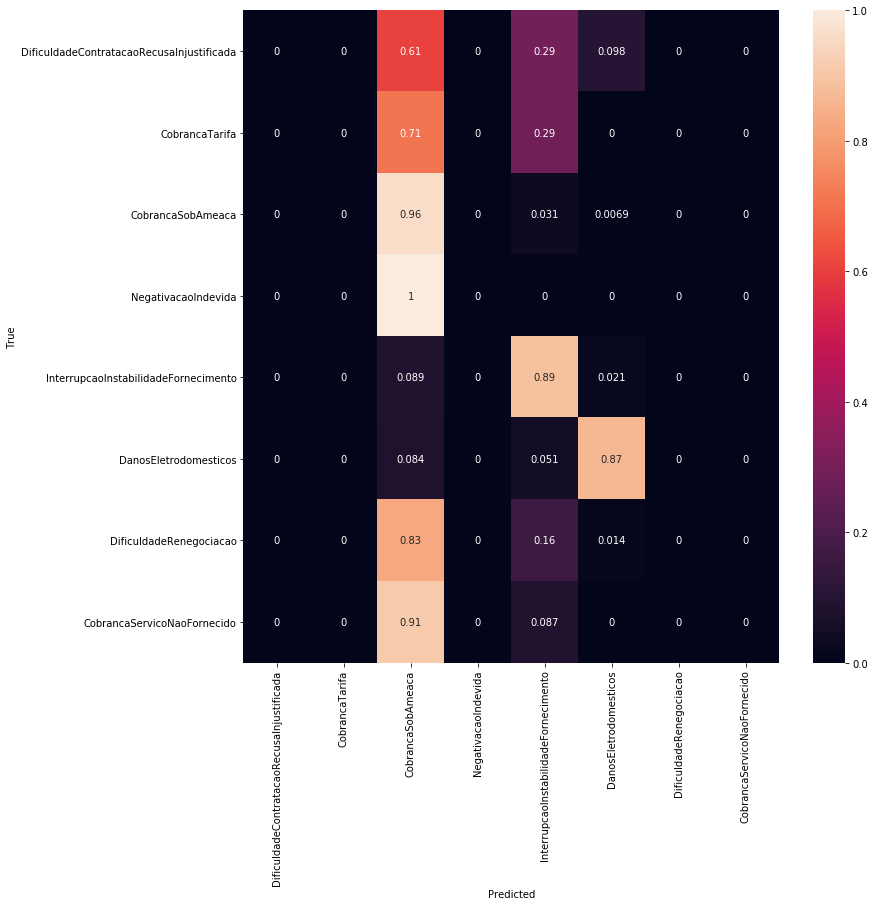

In [89]:
pipe = make_pipeline(
        TfidfVectorizer(),
        MultinomialNB())
pipe.fit(X_train, y_train)

eval_nb = clf_eval(pipe, X_test, y_test, categorias)

Os resultados desse modelo mostram para nós a necessidade de rebalancemento das classes para o treino.

Nesse caso, temos somente três classes que foram estimadas.

Vamos tentar, agora, com um rebalancemento de uppersampling. Faremos isso porque não temos muitos dados <10e8.

# Segundo Modelo 

In [90]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced

Classification Report: 
                                           precision    recall  f1-score   support

              CobrancaServicoNaoFornecido       0.10      0.78      0.18        23
                        CobrancaSobAmeaca       0.68      0.84      0.75      2335
                           CobrancaTarifa       0.08      0.62      0.15        24
                    DanosEletrodomesticos       0.88      0.84      0.86      2291
DificuldadeContratacaoRecusaInjustificada       0.11      0.88      0.19       184
                  DificuldadeRenegociacao       0.07      0.59      0.13        69
     InterrupcaoInstabilidadeFornecimento       0.99      0.74      0.85     10993
                      NegativacaoIndevida       0.05      0.41      0.09        17

                                micro avg       0.77      0.77      0.77     15936
                                macro avg       0.37      0.71      0.40     15936
                             weighted avg       0.91      0.7

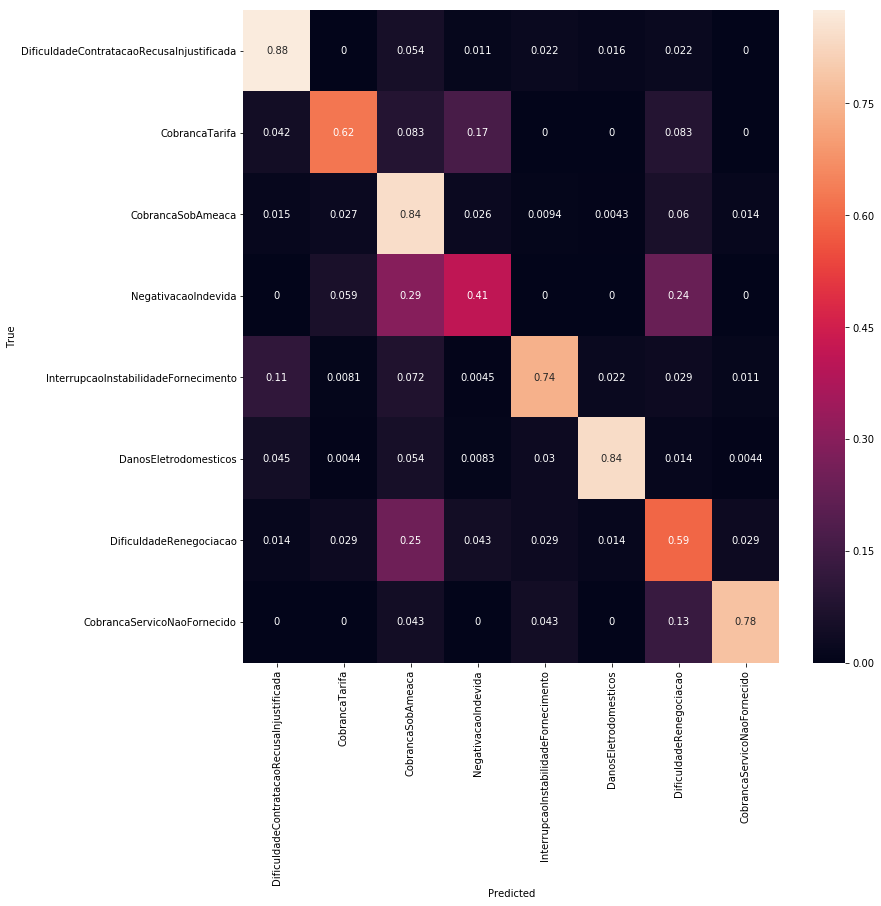

In [91]:
pipe = make_pipeline_imb(TfidfVectorizer(),
                         RandomOverSampler(),
                         MultinomialNB())

pipe.fit(X_train, y_train)

eval_nb_os = clf_eval(pipe, X_test, y_test, categorias)

# Terceiro Modelo

Os resultados do modelo anterior são melhores. Se olharmos para a matriz de confusão,
percebemos que ela está mais equilibrada. 

Porém, se olharmos para as categorias com pouca representatividade, temos um precision muito baixo.

O que quer dizer que o modelo retorna muito documento mal classificado. 


Agora usaremos um modelo de essemble, como o AdaBoost. A literatura sugere que esse método lida bem com esse tipo de 
dataset.

https://sci2s.ugr.es/keel/pdf/algorithm/articulo/2007%20-%20PR%20-%20Sun%20-%20Cost-Sensitive%20boosting.pdf

In [42]:
from sklearn.ensemble import AdaBoostClassifier

Classification Report: 
                                      precision    recall  f1-score   support

         CobrancaServicoNaoFornecido       0.00      0.00      0.00        23
                   CobrancaSobAmeaca       0.55      0.00      0.01      2335
                      CobrancaTarifa       0.15      0.92      0.25        24
InterrupcaoInstabilidadeFornecimento       0.70      0.99      0.82     10993
                 NegativacaoIndevida       0.07      0.53      0.13        17

                           micro avg       0.68      0.81      0.74     13392
                           macro avg       0.29      0.49      0.24     13392
                        weighted avg       0.67      0.81      0.67     13392



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report Imbalanced: 
                                                 pre       rec       spe        f1       geo       iba       sup

              CobrancaServicoNaoFornecido       0.00      0.00      0.99      0.00      0.00      0.00        23
                        CobrancaSobAmeaca       0.55      0.00      1.00      0.01      0.05      0.00      2335
                           CobrancaTarifa       0.15      0.92      0.99      0.25      0.95      0.90        24
                    DanosEletrodomesticos       0.00      0.00      1.00      0.00      0.00      0.00      2291
DificuldadeContratacaoRecusaInjustificada       0.00      0.00      1.00      0.00      0.00      0.00       184
                  DificuldadeRenegociacao       0.00      0.00      1.00      0.00      0.00      0.00        69
     InterrupcaoInstabilidadeFornecimento       0.70      0.99      0.05      0.82      0.23      0.06     10993
                      NegativacaoIndevida       0.07      0.

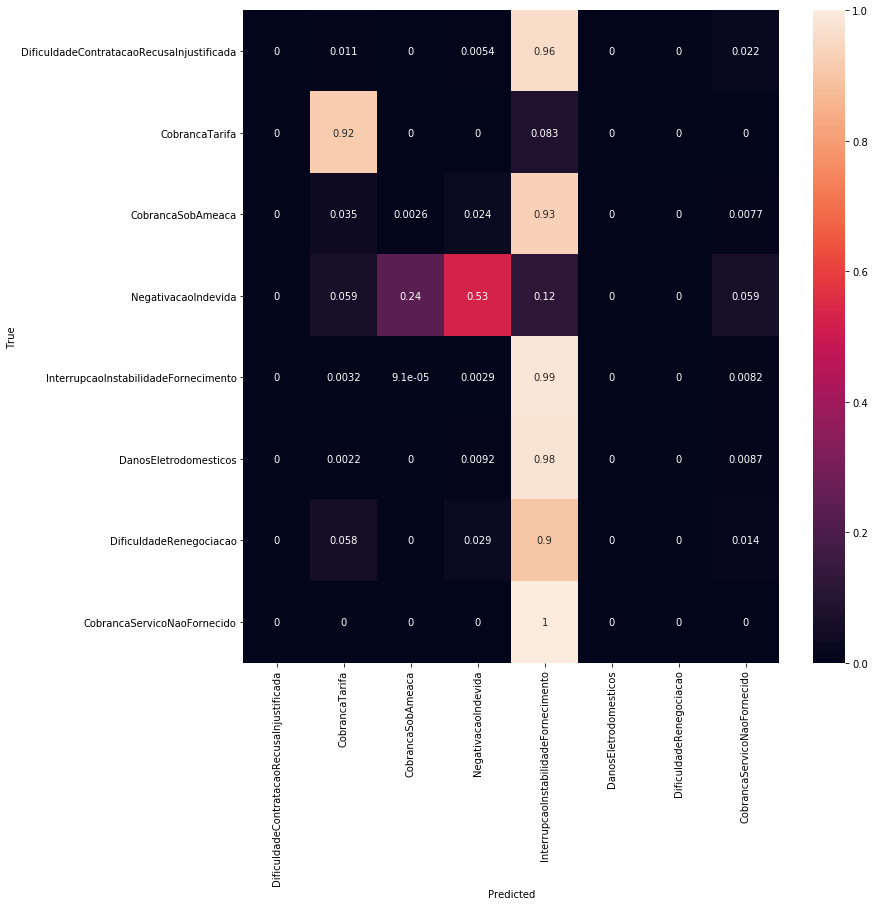

In [43]:
pipe = make_pipeline_imb(TfidfVectorizer(),
                         RandomOverSampler(),
                         AdaBoostClassifier())

pipe.fit(X_train, y_train)

eval_ada_os = clf_eval(pipe, X_test, y_test, categorias)

# Quarto Modelo

In [92]:
from sklearn.svm import LinearSVC

Classification Report: 
                                           precision    recall  f1-score   support

              CobrancaServicoNaoFornecido       0.95      0.87      0.91        23
                        CobrancaSobAmeaca       0.97      0.98      0.98      2335
                           CobrancaTarifa       0.41      0.83      0.55        24
                    DanosEletrodomesticos       0.96      0.98      0.97      2291
DificuldadeContratacaoRecusaInjustificada       0.87      0.93      0.90       184
                  DificuldadeRenegociacao       0.65      0.46      0.54        69
     InterrupcaoInstabilidadeFornecimento       0.99      0.98      0.99     10993
                      NegativacaoIndevida       0.69      0.53      0.60        17

                                micro avg       0.98      0.98      0.98     15936
                                macro avg       0.81      0.82      0.80     15936
                             weighted avg       0.98      0.9

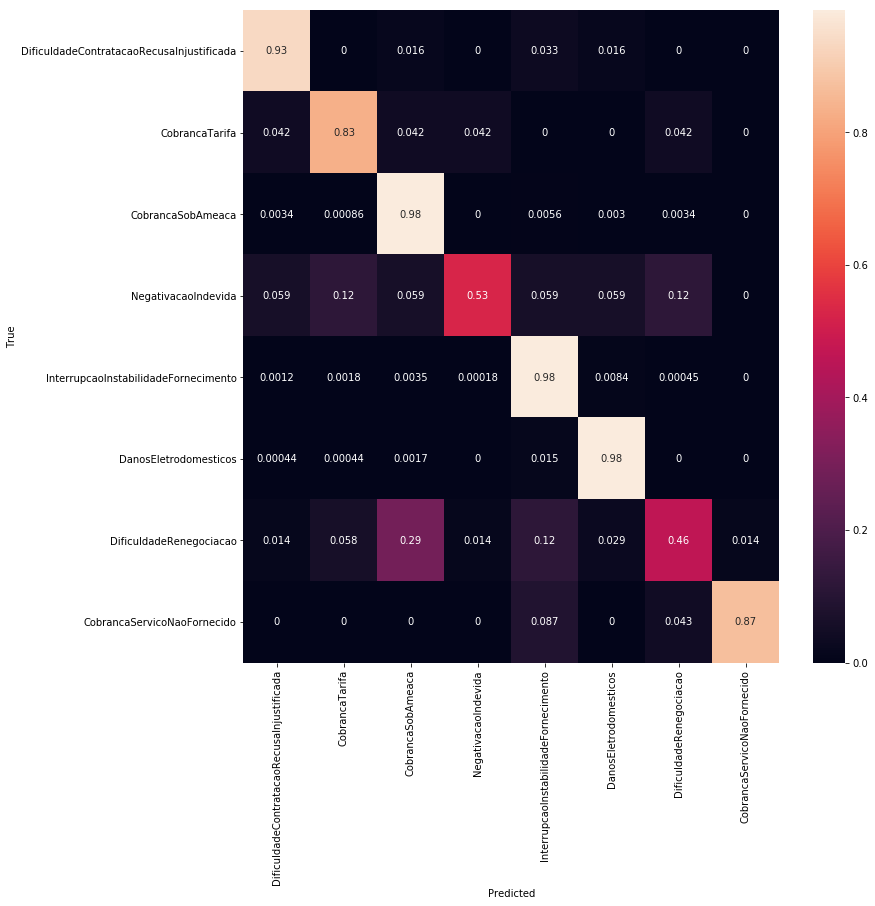

In [93]:
pipe = make_pipeline_imb(TfidfVectorizer(),
                         RandomOverSampler(),
                         LinearSVC())

pipe.fit(X_train, y_train)

eval_ada_os = clf_eval(pipe, X_test, y_test, categorias)